# ESCOLA DNC - CIÊNCIA DE DADOS

## Classificação - Machine Learning

@author: Guilherme Nogueira

### IMPORTAÇÕES

In [1]:
# Gerais
import numpy as np
import pandas as pd
from datetime import date

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

## Dados Desbalanceados - US Accidents Dataset

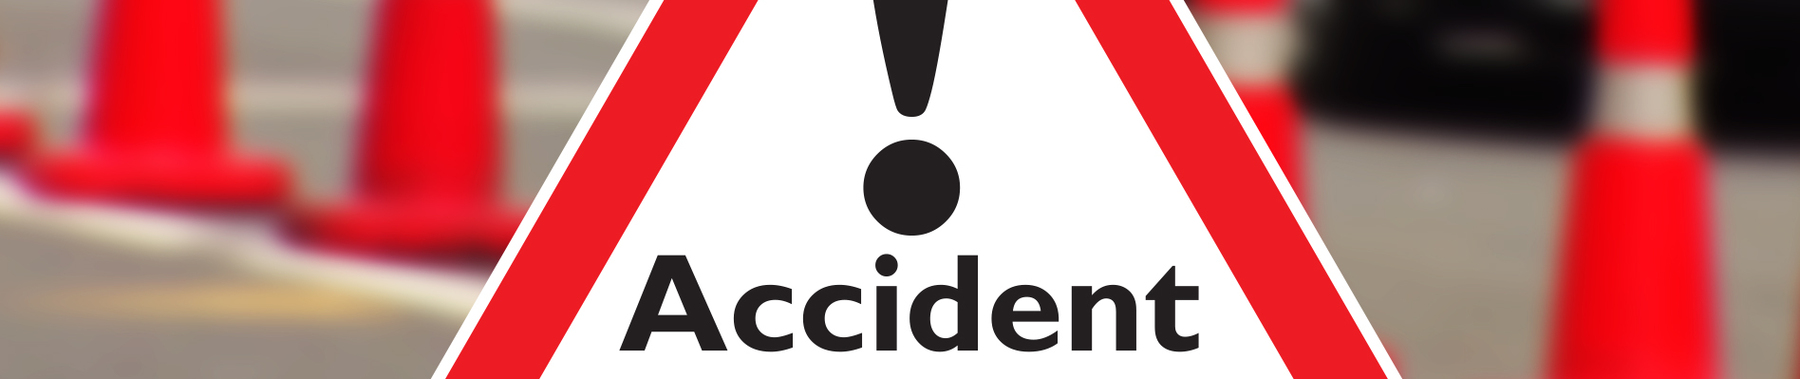

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Aulas - DS/dados/US_Accidents.csv")

In [ ]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"], format="%d-%m-%Y %H:%M", errors="coerce")

In [ ]:
df = df[df["Start_Time"].dt.year.isin([2017])]

In [ ]:
# Transformando o target em uma classificação binária (indicando se foi grave ou não)
df["High_Severity"] = df["Severity"].apply(lambda x: 1 if x >= 3 else 0)

<ipython-input-89-54d9133db853>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["High_Severity"] = df["Severity"].apply(lambda x: 1 if x >= 3 else 0)


In [ ]:
df["High_Severity"].value_counts(normalize=True)

,proportion
High_Severity,
0,0.692745
1,0.307255


In [ ]:
features = [
  'Start_Lat',
  'Start_Lng',
  'End_Lat',
  'End_Lng',
  'Distance(mi)',
  'Temperature(F)',
  'Wind_Chill(F)',
  'Humidity(%)',
  'Pressure(in)',
  'Visibility(mi)',
  'Wind_Speed(mph)',
  'Precipitation(in)'
]

target = "High_Severity"

In [ ]:
X = df[features]
y = df[target]

In [ ]:
X = X.fillna(0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test,  y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86     22530
           1       0.71      0.51      0.60      9873

    accuracy                           0.79     32403
   macro avg       0.76      0.71      0.73     32403
weighted avg       0.78      0.79      0.78     32403



### Random Oversampleing

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
oversampler = RandomOverSampler(random_state=42)

X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

In [ ]:
y_train_over.value_counts(normalize=True)

,proportion
High_Severity,
1,0.5
0,0.5


In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train_over, y_train_over)

y_pred = model.predict(X_test)
print(classification_report(y_test,  y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85     22530
           1       0.66      0.58      0.62      9873

    accuracy                           0.78     32403
   macro avg       0.74      0.73      0.73     32403
weighted avg       0.78      0.78      0.78     32403



### Random Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [ ]:
y_train_under.value_counts(normalize=True)

,proportion
High_Severity,
0,0.5
1,0.5


In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train_under, y_train_under)

y_pred = model.predict(X_test)
print(classification_report(y_test,  y_pred))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78     22530
           1       0.53      0.75      0.62      9873

    accuracy                           0.72     32403
   macro avg       0.70      0.73      0.70     32403
weighted avg       0.76      0.72      0.73     32403



In [ ]:
y_train.shape

(75605,)

In [ ]:
y_train_over.shape

(104584,)

In [ ]:
y_train_under.shape

(46626,)

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote_sampler = SMOTE(random_state=42)
X_train_smote,  y_train_smote = smote_sampler.fit_resample(X_train, y_train)

In [ ]:
 model = RandomForestClassifier(random_state=42)
 model.fit(X_train_smote, y_train_smote)

 y_pred = model.predict(X_test)
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83     22530
           1       0.60      0.66      0.63      9873

    accuracy                           0.76     32403
   macro avg       0.72      0.73      0.73     32403
weighted avg       0.77      0.76      0.77     32403



## Interpretabilidade

###  Carregando dataset

In [ ]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

In [ ]:
X = dataset.data
y = dataset.target

In [ ]:
X = pd.DataFrame(X, columns=dataset.feature_names)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y = pd.Series(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        63
           1       0.97      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
from sklearn.tree import plot_tree

In [ ]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

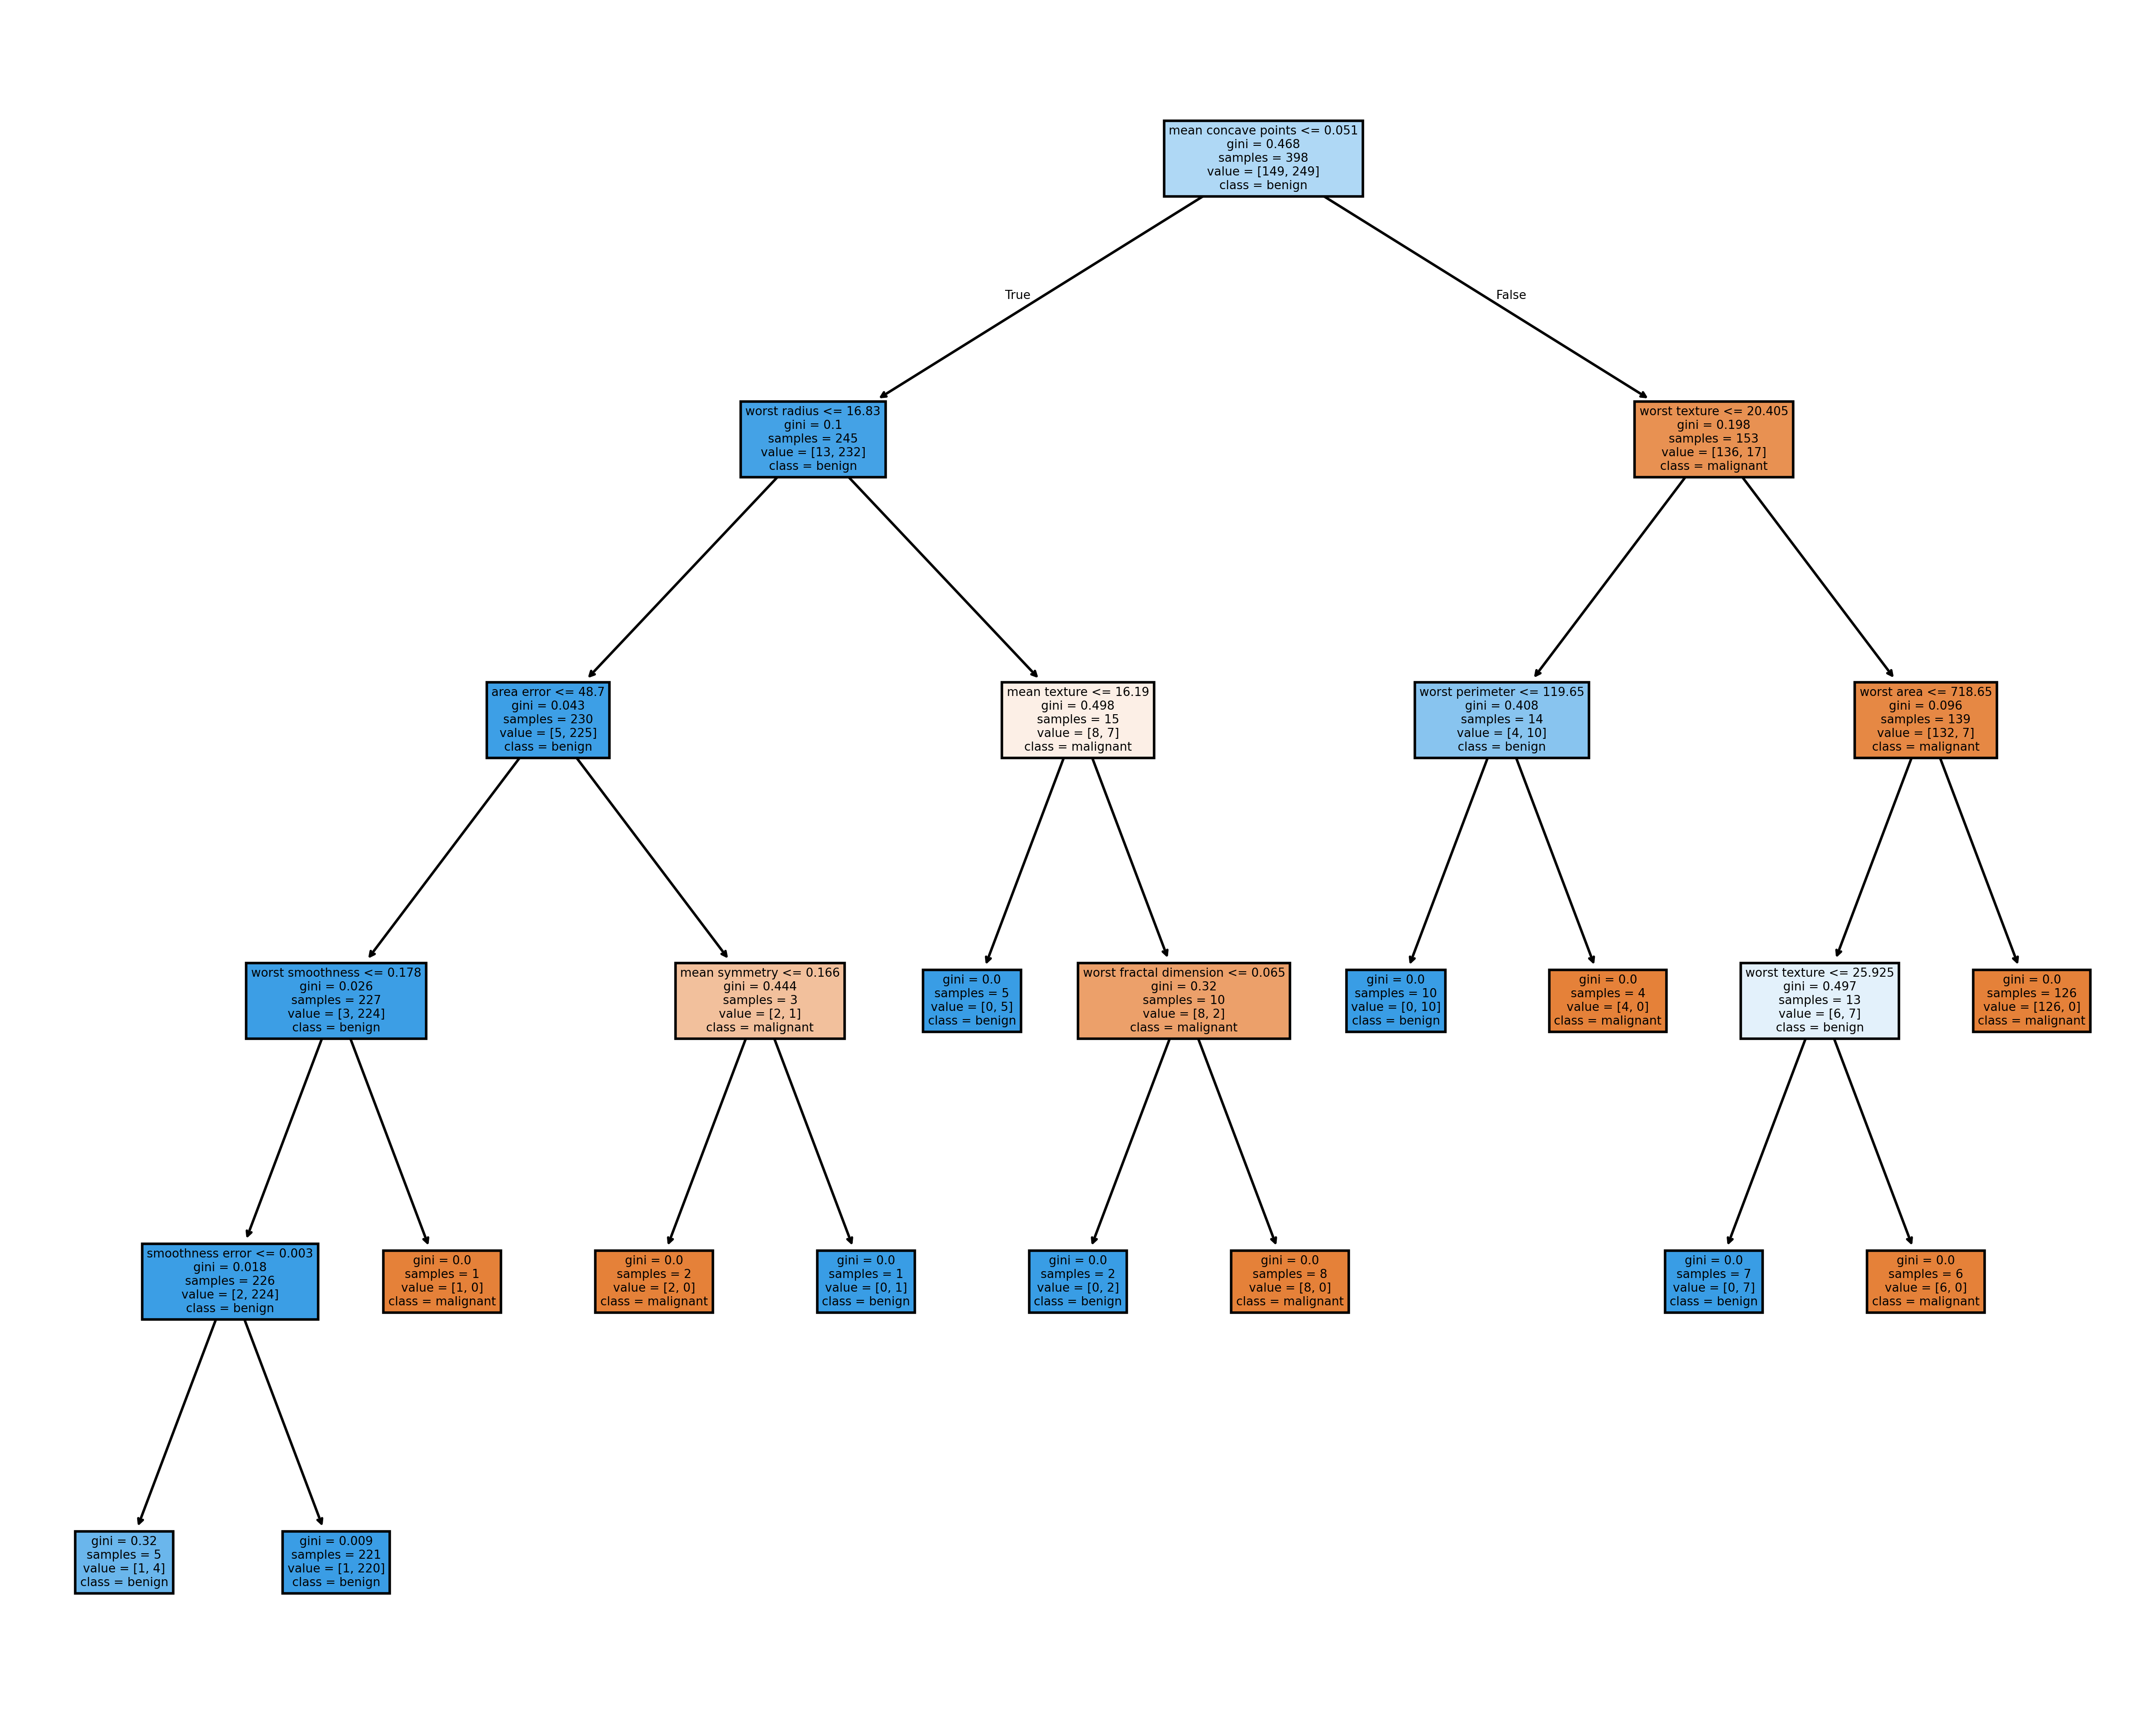

In [ ]:
plt.figure(figsize=(15,12), dpi=400)
plot_tree(model, filled=True, feature_names=X.columns, class_names=dataset.target_names)
plt.show()

### Modelos Black Box

In [ ]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test,  y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model)

In [ ]:
shap_values = explainer.shap_values(X_test)

In [ ]:
shap_values

array([[-2.53180779e-02,  2.14224419e-02, -1.00984065e-02, ...,
         1.08754317e+00,  6.52031985e-02, -1.09836075e-03],
       [-3.80261400e-02, -9.39265013e-02, -9.29234524e-03, ...,
        -1.90874502e+00,  5.51587832e-02, -1.14623636e-02],
       [-5.23732967e-02, -4.61781771e-02, -2.11701896e-02, ...,
        -9.23735207e-01,  3.64711565e-02, -6.14785345e-03],
       ...,
       [-2.81712640e-02,  1.99554619e-02, -1.50860158e-02, ...,
         1.08853212e+00,  9.04468732e-02, -1.09836075e-03],
       [ 3.05724997e-03, -2.82210546e-01, -7.74298532e-03, ...,
        -1.87033935e+00, -2.98304348e-01,  1.67448730e-04],
       [-2.81147151e-02,  2.57859412e-01, -1.54752377e-02, ...,
        -1.93907728e+00,  9.43667708e-02, -4.33453266e-04]])

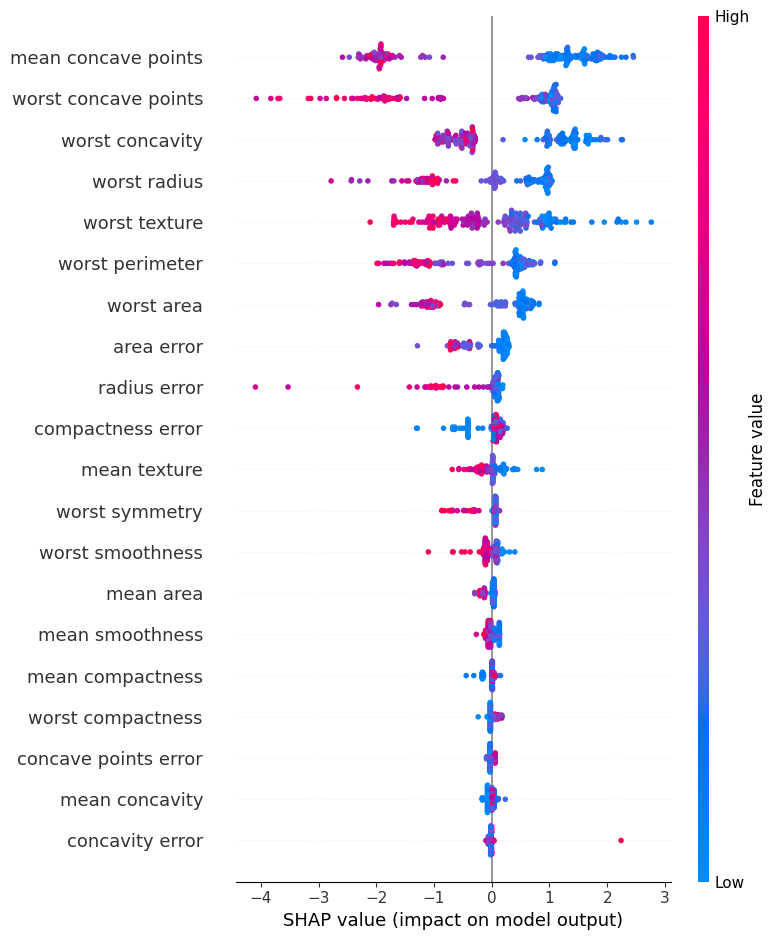

In [ ]:
shap.summary_plot(shap_values, X_test)

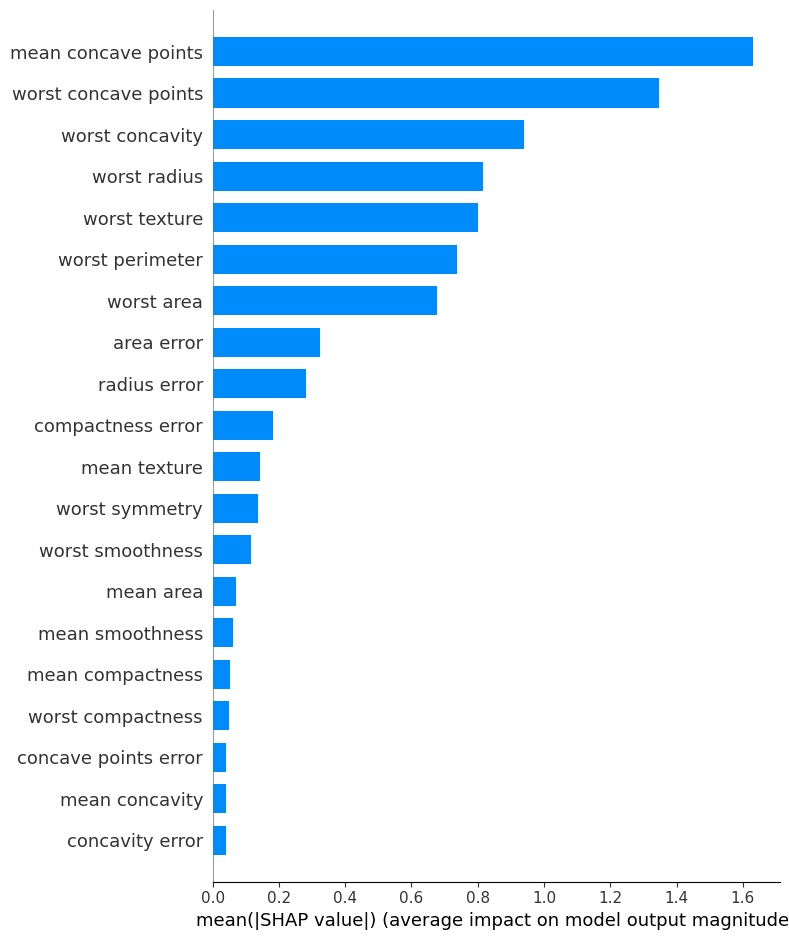

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")